In [1]:
# import sympy
%display typeset

In [2]:
var('S E I A H Lambda beta chi alpha p phi delta rho mu')

(S, E, I, A, H, Lambda, beta, chi, alpha, p, phi, delta, rho, mu)

In [3]:
Lambda = beta*(I+A)
dsdt = -Lambda*(1-chi)*S
dedt = Lambda*(1-chi)*S - alpha*E
didt = (1-p)*alpha*E -delta*I
dadt = p*alpha*E - delta*A
dhdt = phi*delta*I-(rho+mu)*H

In [4]:
solve([dsdt,dedt,didt,dadt,dhdt],[S,E,I,A,H])

[[S == r1, E == 0, I == 0, A == 0, H == 0]]

In [5]:
jack=jacobian([dsdt,dedt,didt,dadt,dhdt],[S,E,I,A,H])
jack

[ (A + I)*beta*(chi - 1)                       0        S*beta*(chi - 1)        S*beta*(chi - 1)                       0]
[-(A + I)*beta*(chi - 1)                  -alpha       -S*beta*(chi - 1)       -S*beta*(chi - 1)                       0]
[                      0          -alpha*(p - 1)                  -delta                       0                       0]
[                      0                 alpha*p                       0                  -delta                       0]
[                      0                       0               delta*phi                       0               -mu - rho]

In [6]:
cp = jack.characteristic_polynomial()
cp

x^5 + (-A*beta*chi - I*beta*chi + A*beta + I*beta + alpha + 2*delta + mu + rho)*x^4 + (-A*alpha*beta*chi - I*alpha*beta*chi + S*alpha*beta*chi - 2*A*beta*chi*delta - 2*I*beta*chi*delta - A*beta*chi*mu - I*beta*chi*mu - A*beta*chi*rho - I*beta*chi*rho + A*alpha*beta + I*alpha*beta - S*alpha*beta + 2*A*beta*delta + 2*I*beta*delta + A*beta*mu + I*beta*mu + A*beta*rho + I*beta*rho + 2*alpha*delta + delta^2 + alpha*mu + 2*delta*mu + alpha*rho + 2*delta*rho)*x^3 + (-2*A*alpha*beta*chi*delta - 2*I*alpha*beta*chi*delta + S*alpha*beta*chi*delta - A*beta*chi*delta^2 - I*beta*chi*delta^2 - A*alpha*beta*chi*mu - I*alpha*beta*chi*mu + S*alpha*beta*chi*mu - 2*A*beta*chi*delta*mu - 2*I*beta*chi*delta*mu - A*alpha*beta*chi*rho - I*alpha*beta*chi*rho + S*alpha*beta*chi*rho - 2*A*beta*chi*delta*rho - 2*I*beta*chi*delta*rho + 2*A*alpha*beta*delta + 2*I*alpha*beta*delta - S*alpha*beta*delta + A*beta*delta^2 + I*beta*delta^2 + A*alpha*beta*mu + I*alpha*beta*mu - S*alpha*beta*mu + 2*A*beta*delta*mu + 2*I*beta*delta*mu + A*alpha*beta*rho + I*alpha*beta*rho - S*alpha*beta*rho + 2*A*beta*delta*rho + 2*I*beta*delta*rho + alpha*delta^2 + 2*alpha*delta*mu + delta^2*mu + 2*alpha*delta*rho + delta^2*rho)*x^2 + (-A*alpha*beta*chi*delta^2 - I*alpha*beta*chi*delta^2 - 2*A*alpha*beta*chi*delta*mu - 2*I*alpha*beta*chi*delta*mu + S*alpha*beta*chi*delta*mu - A*beta*chi*delta^2*mu - I*beta*chi*delta^2*mu - 2*A*alpha*beta*chi*delta*rho - 2*I*alpha*beta*chi*delta*rho + S*alpha*beta*chi*delta*rho - A*beta*chi*delta^2*rho - I*beta*chi*delta^2*rho + A*alpha*beta*delta^2 + I*alpha*beta*delta^2 + 2*A*alpha*beta*delta*mu + 2*I*alpha*beta*delta*mu - S*alpha*beta*delta*mu + A*beta*delta^2*mu + I*beta*delta^2*mu + 2*A*alpha*beta*delta*rho + 2*I*alpha*beta*delta*rho - S*alpha*beta*delta*rho + A*beta*delta^2*rho + I*beta*delta^2*rho + alpha*delta^2*mu + alpha*delta^2*rho)*x - A*alpha*beta*chi*delta^2*mu - I*alpha*beta*chi*delta^2*mu - A*alpha*beta*chi*delta^2*rho - I*alpha*beta*chi*delta^2*rho + A*alpha*beta*delta^2*mu + I*alpha*beta*delta^2*mu + A*alpha*beta*delta^2*rho + I*alpha*beta*delta^2*rho

In [7]:
F_cal = matrix([[Lambda*(1-chi)*S],[0],[0]])
F_cal

[-(A + I)*S*beta*(chi - 1)]
[                        0]
[                        0]

In [8]:
V_cal_neg = matrix([[alpha*E],[delta*I],[delta*A]])
V_cal_neg

[E*alpha]
[I*delta]
[A*delta]

In [9]:
V_cal_pos = matrix([[0],[(1-p)*alpha*E],[p*alpha*E]])
V_cal_pos

[               0]
[-E*alpha*(p - 1)]
[       E*alpha*p]

In [10]:
V_cal = V_cal_neg-V_cal_pos
V_cal

[                  E*alpha]
[E*alpha*(p - 1) + I*delta]
[     -E*alpha*p + A*delta]

In [11]:
F = jacobian(F_cal(S=1),[E,I,A])
F

[              0 -beta*(chi - 1) -beta*(chi - 1)]
[              0               0               0]
[              0               0               0]

In [12]:
V = jacobian(V_cal(S=1),[E,I,A])
V

[        alpha             0             0]
[alpha*(p - 1)         delta             0]
[     -alpha*p             0         delta]

In [13]:
M = F*V.inverse()

In [14]:
M=M.simplify_full()
M

[-(beta*chi - beta)/delta -(beta*chi - beta)/delta -(beta*chi - beta)/delta]
[                       0                        0                        0]
[                       0                        0                        0]

In [15]:
M.eigenvalues()

[-(beta*chi - beta)/delta, 0, 0]

In [16]:
R0=M[0,0].simplify_full()
R0

-(beta*chi - beta)/delta

In [17]:
R0.variables()

(beta, chi, delta)

In [31]:
import numpy as np
import pandas as pd
%display typeset

In [32]:
def model(t, y, params):
    S, E, I, A, H, R, C, D = y
    chi, phi, beta, rho, delta, gamma, alpha, mu, p, q, r = params
    lamb = beta * (I + A)
    # Turns on Quarantine on day q and off on day q+r
    chi *= ((1 + np.tanh(t - q)) / 2) * ((1 - np.tanh(t - (q + r))) / 2)
    return [
        -lamb * ((1 - chi) * S),  # dS/dt
        lamb * ((1 - chi) * S) - alpha * E,  # dE/dt
        (1 - p) * alpha * E - delta * I - phi * I,  # dI/dt
        p * alpha * E - gamma * A,
        phi * I - (rho + mu) * H,  # dH/dt
        delta * I + rho * H + gamma * A,  # dR/dt
        phi * I,  # (1-p)*alpha*E+ p*alpha*E # Hospit. acumuladas
        mu * H  # Morte acumuladas
    ]

In [33]:
chi = .3
phi = 0.012413633926076584
beta = 0.27272459855759813
rho = 0.2190519831830368
delta = 0.04168480042146949
gamma = 0.04
alpha =  0.3413355572047603
mu = 0.02359234606623134
p = 0.7693029079871165
q = 50
r = 55

In [34]:
T = ode_solver()
T.function = model
T.algorithm='rk8pd'
inits = [.99, 0, 1e-4, 0, 0, 0, 0, 0]
tspan = [0,200]
T.ode_solve(tspan, inits, num_points=200, params=[chi,phi,beta,rho,delta,gamma,alpha,mu,p,q,r])

In [35]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[9.90000000e-01, 0.00000000e+00, 1.00000000e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.89973344e-01, 2.25755111e-05, 9.56580086e-05, ...,
        4.23720621e-06, 1.21233870e-06, 1.33047275e-08],
       [9.89946090e-01, 3.91711356e-05, 9.30197071e-05, ...,
        8.76177490e-06, 2.38193156e-06, 4.86367287e-08],
       ...,
       [7.05921911e-03, 4.50726801e-05, 5.18874882e-04, ...,
        9.70886461e-01, 5.19350779e-02, 5.04644718e-03],
       [7.04595718e-03, 4.32611015e-05, 4.94934735e-04, ...,
        9.71170175e-01, 5.19413692e-02, 5.04720754e-03],
       [7.03322409e-03, 4.15259091e-05, 4.72119417e-04, ...,
        9.71443013e-01, 5.19473704e-02, 5.04793268e-03]])

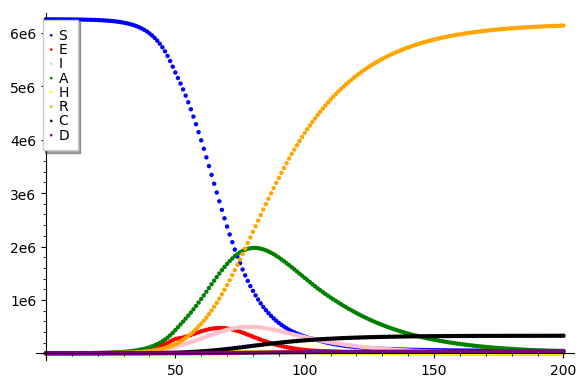

In [36]:
popRJ = 6.32e6
def plot_sol(sol):
    sim = get_sim_array(sol)*popRJ
    P = list_plot(sim[:,0],legend_label='S')
    colors = ['blue','red','pink','green','yellow','orange','black','purple']
    for i,var in enumerate(['E','I','A','H','R','C','D']):
        P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
    show(P)
plot_sol(T.solution)

In [27]:
sims = get_sim_array(T.solution)
sims[-1,-2]*popRJ

328307.38107624033

In [1]:
%display typeset

In [2]:
def ODEsys(t,y,params):
    k1,k2 = params
    A,B = y
    return[-k1*A+k2*B,
            k1*A-k2*B]

In [3]:
T=ode_solver()
T.algorithm="rk8pd"
T.function=ODEsys
T.ode_solve(y_0=[500,0],t_span=[0,50],params=[.3,.25],num_points=200)

In [4]:
T.solution[:10]

[(0, [500, 0]),
 (0.25, [464.9639136355884, 35.03608636441148]),
 (0.5, [434.42876087953675, 65.57123912046313]),
 (0.75, [407.81632637022733, 92.18367362977253]),
 (1.0, [384.6226755583144, 115.37732444168543]),
 (1.25, [364.4086121738929, 135.591387826107]),
 (1.5, [346.7913615813497, 153.2086384186502]),
 (1.75, [331.43732253744054, 168.56267746255938]),
 (2.0, [318.0557500994762, 181.94424990052374]),
 (2.25, [306.39325006281507, 193.6067499371849])]

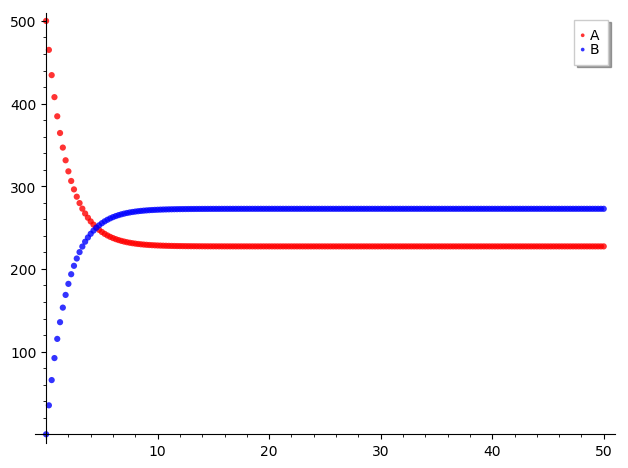

In [5]:
a=list_plot([(i[0],i[1][0]) for i in T.solution],color='red', pointsize=20, legend_label='A', alpha=.8)
b=list_plot([(i[0],i[1][1]) for i in T.solution],color='blue', pointsize=20, legend_label='B', alpha=.8)
a.legend()
b.legend()
show(a+b)

In [6]:
var('t k_1 k_2')

A = function('A')(t)
B = function('B')(t)
de1 = diff(A,t) == -k_1*A+k_2*B
de2 = diff(B,t) == k_1*A-k_2*B
sol = desolve_system([de1,de2],[A,B],ics=[0,500,0], ivar=t)
show(sol)

[A(t) == 500*k_1*e^(-(k_1 + k_2)*t)/(k_1 + k_2) + 500*k_2/(k_1 + k_2),
 B(t) == -500*k_1*e^(-(k_1 + k_2)*t)/(k_1 + k_2) + 500*k_1/(k_1 + k_2)]

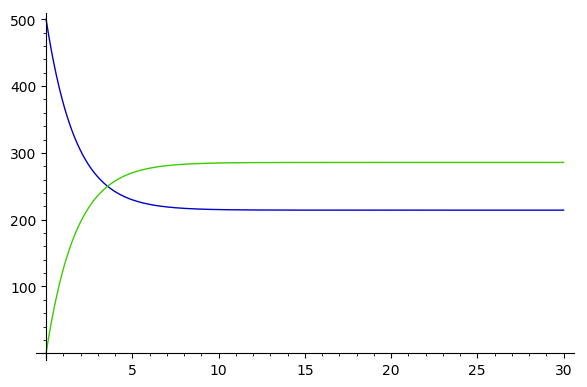

In [7]:
solA, solB = sol[0].rhs(), sol[1].rhs()
plot((solA(k_1=1/3, k_2=1/4),solB(k_1=1/3, k_2=1/4)),(t,0,30))

In [8]:
k1=1/3
k2=1/4
n(k2*500/(k1+k2))

214.285714285714

In [9]:
var('A B k1 k2')
#k1 = 1/3
#k2 = 1/4
dadt(A, B) = -k1*A+k2*B
dbdt(A, B) = k1*A-k2*B
eqs = solve([dadt, dbdt], [A, B])
show(html("<h4>Equilíbrios:</h4>"))
show(eqs)

<h4>Equilíbrios:</h4>

[[A == k2*r1/k1, B == r1]]

In [10]:
M = matrix([[-1/3, 1/4],[1/3,-1/4]])
show("M=",M)
X = matrix([[A],[B]])
show("X=",X)
M*X

'M=' [-1/3  1/4]
[ 1/3 -1/4]

'X=' [A]
[B]

[-1/3*A + 1/4*B]
[ 1/3*A - 1/4*B]

In [11]:
jack = jacobian([-k1*A+k2*B, k1*A-k2*B],[A,B])
show(html("<h3>Jacobiana:</h3>"))
show(jack)

<h3>Jacobiana:</h3>

[-k1  k2]
[ k1 -k2]

In [12]:
jack.eigenvalues()

[-k1 - k2, 0]

In [13]:
var('t I gamma x0')
x=function('x')(t)
dxdt = diff(x,t)== I-gamma*x
sol = desolve(dxdt,x,ivar=t, ics=[0,x0])
show(sol)

(gamma*x0 + I*e^(gamma*t) - I)*e^(-gamma*t)/gamma

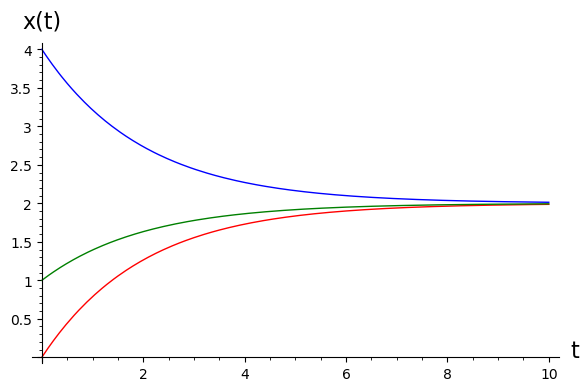

In [14]:
f(t) = sol(I=1,gamma=1/2,x0=4)
g(t) = sol(I=1,gamma=1/2,x0=0)
h(t) = sol(I=1,gamma=1/2,x0=1)
(plot(f, 0,10,axes_labels=['t','x(t)']) + plot(g, 0,10,axes_labels=['t','x(t)'], color='red') +\
 plot(h, 0,10,axes_labels=['t','x(t)'], color='green'))